In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt     

In [81]:
df = pd.read_csv(r'C:\Users\kumar\OneDrive\Desktop\Machine Learning\Jupyter\DL_Classroom\Learning\Obesity_detector\Obesity Classification.csv')
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
gender_encoded = encoder.fit_transform(df['Gender'])
df['Gender'] = gender_encoded
df.drop('ID',axis=1,inplace=True)


In [83]:
x = df.drop('Label',axis=1)
y = df['Label']

In [84]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [86]:
model = DecisionTreeClassifier()

model.fit(x_train,y_train)


DecisionTreeClassifier()

In [87]:
y_pred = model.predict(x_test)

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [89]:
cm = confusion_matrix(y_pred,y_test)

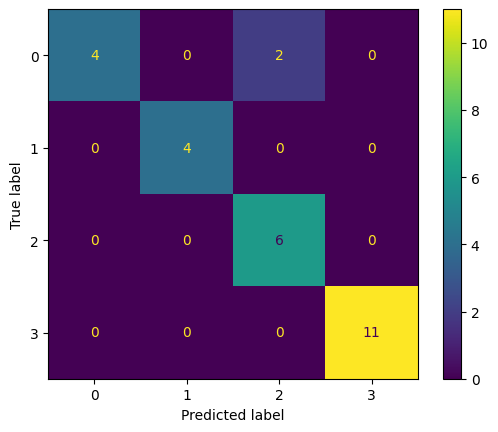

In [90]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [91]:
report = classification_report(y_pred,y_test)
print(report)

               precision    recall  f1-score   support

Normal Weight       1.00      0.67      0.80         6
        Obese       1.00      1.00      1.00         4
   Overweight       0.75      1.00      0.86         6
  Underweight       1.00      1.00      1.00        11

     accuracy                           0.93        27
    macro avg       0.94      0.92      0.91        27
 weighted avg       0.94      0.93      0.92        27



In [92]:
from sklearn import tree

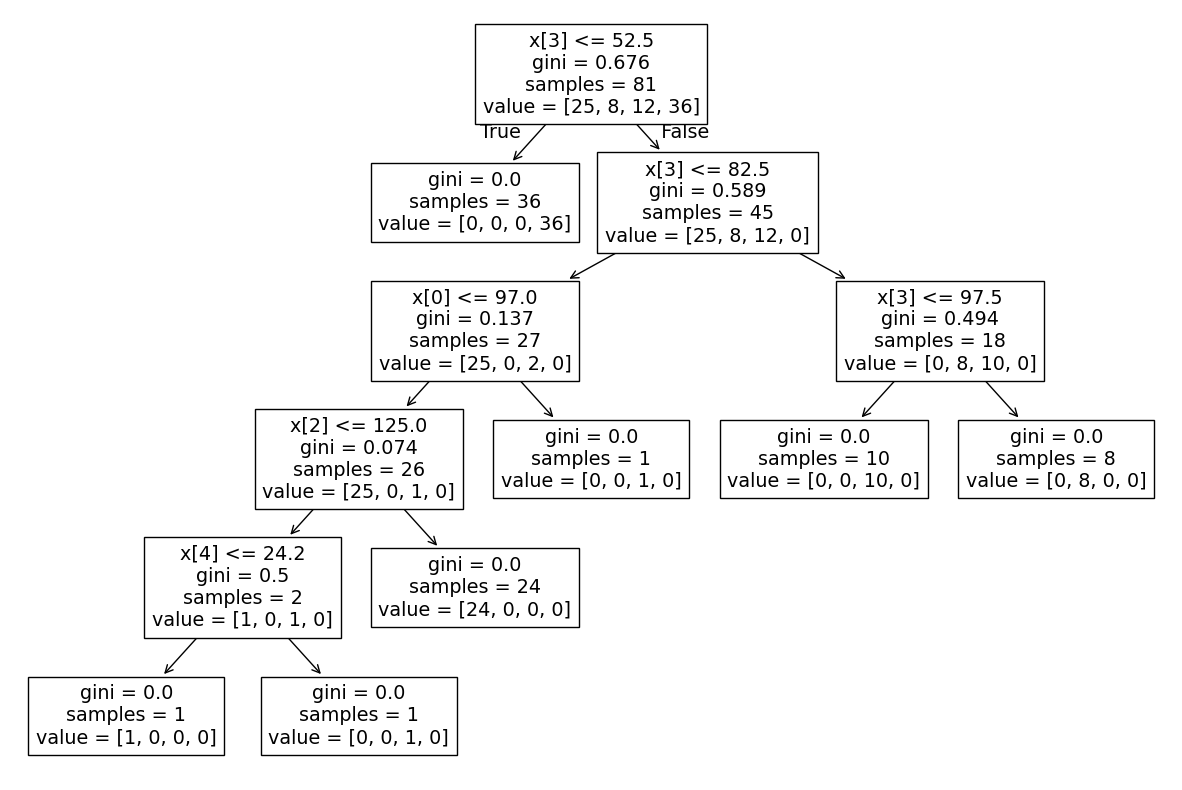

In [93]:
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

In [100]:
import pickle

In [104]:
with open('obesity_model.h5','wb') as file:
    pickle.dump(model,file)